In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('../datasets/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.shape

(768, 9)

In [18]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [19]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state= 42, test_size= 0.2
)


In [21]:
random_forest_param_grid = [
    {
        'n_estimators': [5, 10, 15],
        'max_features': [2, 3, 4],
        'min_samples_split': [2, 3, 4]
    }
]


In [22]:

rf = RandomForestClassifier()

gridsearch = GridSearchCV(
    estimator=rf,
    param_grid=random_forest_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [23]:
grid_results = gridsearch.fit(X_train,y_train)

In [24]:
results_df = pd.DataFrame(grid_results.cv_results_)
results_df[['n_estimators', 'max_features', 'min_samples_split']] = (
    results_df['params'].apply(pd.Series)
)

results_df[['n_estimators', 'max_features', 'min_samples_split', 'mean_test_score']] \
    .sort_values(by='mean_test_score', ascending=False)


,n_estimators,max_features,min_samples_split,mean_test_score
1,2,2,10,0.765534
25,4,4,10,0.762295
23,4,3,15,0.760642
13,3,3,10,0.760629
15,3,4,5,0.760629
14,3,3,15,0.760602
26,4,4,15,0.760602
22,4,3,10,0.757390
5,2,3,15,0.755698
2,2,2,15,0.754125


In [25]:
best_model = grid_results.best_estimator_
best_model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",2
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_tru

In [26]:
y_pred = best_model.predict(X_test)

In [28]:
print(f'Accuracy is :{accuracy_score(y_test,y_pred)}')

Accuracy is :0.7662337662337663


In [29]:
print(f'classification_report: {classification_report(y_test, y_pred)}')

classification_report:               precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [30]:
print(f'confusion_matrix: {confusion_matrix(y_test, y_pred)}')

confusion_matrix: [[85 14]
 [22 33]]


<Axes: >

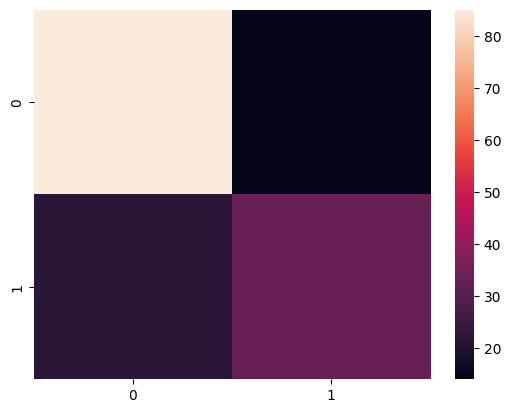

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [33]:
from sklearn.model_selection import RandomizedSearchCV
 
rand_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions= random_forest_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)
 

In [ ]:
rand_result = rand_search.fit(X_train, y_train)

In [34]:
y_pred = best_model.predict(X_test)


In [37]:
print(f'Accuracy is :{accuracy_score(y_test,y_pred)}\n')
print(f'classification_report: {classification_report(y_test, y_pred)}\n')
print(f'confusion_matrix: {confusion_matrix(y_test, y_pred)}\n')


Accuracy is :0.7662337662337663

classification_report:               precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154


confusion_matrix: [[85 14]
 [22 33]]



<Axes: >

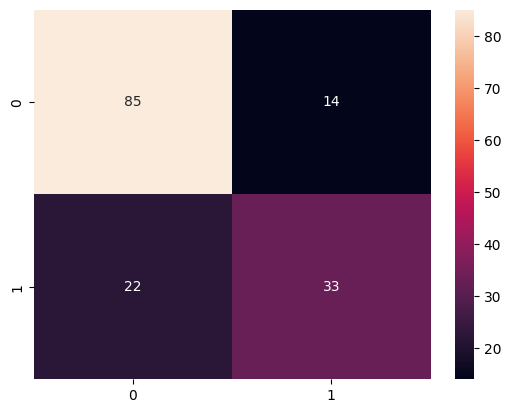

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')